In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data_path = '/content/drive/My Drive/Devanagari/Prachanda_Devanagari_final.csv'
df = pd.read_csv(data_path)

In [4]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [5]:
before_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_df = df_filtered[df_filtered['time_period'] == 'after_election']

In [6]:
df1= before_df['text']
df2= after_df['text']

In [7]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import re
import spacy


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df1:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines1 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines1.append(w)


print(lines1)

['राष्ट्र', 'सर्वोपर.....', 'यस्ता', 'थुला', 'ज', 'का', 'पएलत', 'हु', 'भन्ने', 'यो', '२', 'डका', 'ज्ञानमारा', 'भ्रास्त', 'देशद्रोही', 'गधर', 'भारतीय', 'एजेन्ट', 'दलाल', 'नैतिक', 'हीन', 'माफियाको', 'पल्टु', 'कुकुर', 'राष्ट्रघाटी', 'देशद्रोही', 'हो', 'यो', '२', 'कुकुर', 'भुकेको', 'उनको', 'रामेलो', 'छ', 'नेपाल', 'लाइ', 'बिकास', 'देश', 'बनाउ', 'न', 'कुनै', 'राजनितिक', 'नेता', 'ना', 'आउ', 'न', 'रैछ', 'खाली', 'बेकर', 'को', 'कुरा', '।कुरा', 'वान्दा', 'बसी', 'नेपाल', 'को', 'विशेषता', 'हर्नु', 'ने', '।', 'गोरखा', 'जिल्ला', 'को', 'माँक्से', 'हारु', 'ले', 'बुझु', 'पर्न', 'कुरु', 'आहा', 'कटि', 'मिठो', 'गीत...', 'दया', 'ह्याङ्ग', 'सदा', 'राम्रो', 'प्रचण्ड', 'प्रेम', 'राई', 'राजा', 'हो', 'भोजपुरे', 'हिरो', 'बबल', 'दया', 'दाइ..', 'एन', 'लक्ष्मी', 'उर', 'मेरो', 'मनपर्ने', 'जय', 'हिन्द', 'क्षेत्री', 'बाहुन', 'ले', 'ग्रने', 'ति', 'हो', ',', '<br>', ',', '<br>', 'कालो', 'एन', 'सेतो', 'टिभी', ',', '<br>', 'एलईडी', ',', 'एलसीडी', ',', 'यूट्यूब', ',', 'मिति', 'म्याद', 'सकिने', ',', 'राई', 'दाइ', 'को', 'तमा'

In [9]:
import re

lines1 = [re.sub(r'[^अ-ह़\w]+', '', x) for x in lines1]

lines1_final = []

for word in lines1:
    if word != '':
        lines1_final.append(word)

print(lines1_final)


['रषटर', 'सरवपर', 'यसत', 'थल', 'ज', 'क', 'पएलत', 'ह', 'भनन', 'य', '२', 'डक', 'जञनमर', 'भरसत', 'दशदरह', 'गधर', 'भरतय', 'एजनट', 'दलल', 'नतक', 'हन', 'मफयक', 'पलट', 'ककर', 'रषटरघट', 'दशदरह', 'ह', 'य', '२', 'ककर', 'भकक', 'उनक', 'रमल', 'छ', 'नपल', 'लइ', 'बकस', 'दश', 'बनउ', 'न', 'कन', 'रजनतक', 'नत', 'न', 'आउ', 'न', 'रछ', 'खल', 'बकर', 'क', 'कर', 'कर', 'वनद', 'बस', 'नपल', 'क', 'वशषत', 'हरन', 'न', 'गरख', 'जलल', 'क', 'मकस', 'हर', 'ल', 'बझ', 'परन', 'कर', 'आह', 'कट', 'मठ', 'गत', 'दय', 'हयङग', 'सद', 'रमर', 'परचणड', 'परम', 'रई', 'रज', 'ह', 'भजपर', 'हर', 'बबल', 'दय', 'दइ', 'एन', 'लकषम', 'उर', 'मर', 'मनपरन', 'जय', 'हनद', 'कषतर', 'बहन', 'ल', 'गरन', 'त', 'ह', 'br', 'br', 'कल', 'एन', 'सत', 'टभ', 'br', 'एलईड', 'एलसड', 'यटयब', 'मत', 'मयद', 'सकन', 'रई', 'दइ', 'क', 'तम', 'ठल', 'फयन', 'यस', 'गदधर', 'क', 'भसन', 'म', 'तल', 'पटन', 'जनत', 'हर', 'कहल', 'सधरन', 'ह', 'जनवर', 'हर', 'चनब', 'लगन', 'लगय', 'न', 'त', 'भइ', 'सब', 'लइ', 'लयउन', 'तय', 'बल', 'नबजन', 'सर', 'ल', 'नलकन', 'हल', 'ह', 'plss', 'नयम', 'अधनयम', 'अनशसन'

In [10]:
nepali_stop_words = {
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।' }

# Remove stop words
stem1 = [word for word in lines1_final if word not in nepali_stop_words]

print(stem1)

['रषटर', 'सरवपर', 'यसत', 'थल', 'ज', 'क', 'पएलत', 'ह', 'भनन', 'य', '२', 'डक', 'जञनमर', 'भरसत', 'दशदरह', 'गधर', 'भरतय', 'एजनट', 'दलल', 'नतक', 'हन', 'मफयक', 'पलट', 'ककर', 'रषटरघट', 'दशदरह', 'ह', 'य', '२', 'ककर', 'भकक', 'उनक', 'रमल', 'नपल', 'लइ', 'बकस', 'दश', 'बनउ', 'न', 'कन', 'रजनतक', 'नत', 'न', 'आउ', 'न', 'रछ', 'खल', 'बकर', 'क', 'कर', 'कर', 'वनद', 'बस', 'नपल', 'क', 'वशषत', 'हरन', 'न', 'गरख', 'जलल', 'क', 'मकस', 'हर', 'ल', 'बझ', 'परन', 'कर', 'आह', 'कट', 'मठ', 'गत', 'दय', 'हयङग', 'सद', 'रमर', 'परचणड', 'परम', 'रई', 'रज', 'ह', 'भजपर', 'हर', 'बबल', 'दय', 'दइ', 'एन', 'लकषम', 'उर', 'मर', 'मनपरन', 'जय', 'हनद', 'कषतर', 'बहन', 'ल', 'गरन', 'ह', 'br', 'br', 'कल', 'एन', 'सत', 'टभ', 'br', 'एलईड', 'एलसड', 'यटयब', 'मत', 'मयद', 'सकन', 'रई', 'दइ', 'क', 'तम', 'ठल', 'फयन', 'यस', 'गदधर', 'क', 'भसन', 'तल', 'पटन', 'जनत', 'हर', 'कहल', 'सधरन', 'ह', 'जनवर', 'हर', 'चनब', 'लगन', 'लगय', 'न', 'भइ', 'सब', 'लइ', 'लयउन', 'तय', 'बल', 'नबजन', 'सर', 'ल', 'नलकन', 'हल', 'ह', 'plss', 'नयम', 'अधनयम', 'अनशसन', 'भरतय', 'सन', 'नपस

In [11]:
!apt-get install -y fonts-noto

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 317 MB of archives.
After this operation, 789 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:2022

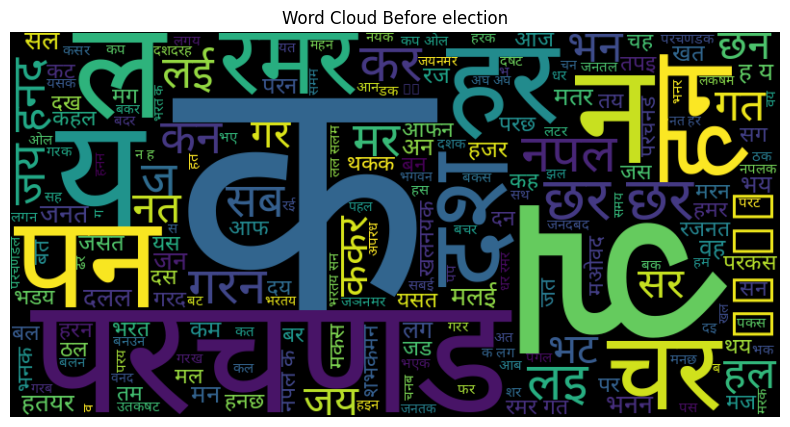

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem1

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before election')
plt.show()

In [13]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df2:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines2 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines2.append(w)


print(lines2)

['सबे', 'आफनो', 'देश', 'रा', 'आफनो', 'आफन्त', 'को', 'समर्थन', 'हान', 'वनाय', 'अरु', 'समर्थन', 'गर्नाए', 'कुरा', 'त', 'छिन्ना', 'आनी', 'जनता', 'हारु', 'सबाए', 'आफनो', 'आफन्त', 'को', 'समर्थन', 'मा', 'क्सन्ना', 'वनाए', 'यो', 'हिमानी', 'शाह', 'हरुको', 'मा', 'चाहि', 'समर्थन', 'समुह', 'हरु', 'चाहिँ', 'बात', 'आयो', 'वर्ष', 'राम्रो', '२०२४', 'थुक्का', 'घु', 'पत्रुकर', 'हो', 'हात्यारा', 'लाइ', 'पानी', 'अन्तर्वार्ता', 'लाइन।', 'Goc', 'पूरा', 'इन्डेन', 'दलाल', 'अङ्ग्रेजी', 'मै', 'भन्देको', 'भये', 'हुनथ्यो', 'यो', 'प्रश्न', 'चिन्ह', 'हटौना', 'पर्यो', '!!!', 'अरन्भ', 'हो', 'प्रचण्ड', 'फोहोर', 'को', 'डुङ्गो', 'गठबन्धन', 'मा', 'रवि', 'लामिछाने', 'जाना', 'लाइ', 'सु', 'कामना', 'छ।', 'आरम्भ', 'है', 'प्रचण्ड<br><br>उत्तम', 'लाइन', ':-', '..<br>', '...<br>', '<br>', '..<br>', '...<br>', '<br><i>__________________</i><', 'br><br>', ',', '...<br>', '...<br>', '...<br>', '...<br>', '<br><br>आरंभ', 'है', 'प्रचण्ड........जय', 'श्री', 'राम...', '?', '?', '<br>', '?', 'जादुई', 'पार्टी?', '?', '?', '?', '?<br>', 

In [14]:
import re

lines2 = [re.sub(r'[^अ-ह़\w]+', '', x) for x in lines2]

lines2_final = []

for word in lines2:
    if word != '':
        lines2_final.append(word)

print(lines2_final)


['सब', 'आफन', 'दश', 'र', 'आफन', 'आफनत', 'क', 'समरथन', 'हन', 'वनय', 'अर', 'समरथन', 'गरनए', 'कर', 'त', 'छनन', 'आन', 'जनत', 'हर', 'सबए', 'आफन', 'आफनत', 'क', 'समरथन', 'म', 'कसनन', 'वनए', 'य', 'हमन', 'शह', 'हरक', 'म', 'चह', 'समरथन', 'समह', 'हर', 'चह', 'बत', 'आय', 'वरष', 'रमर', '२०२४', 'थकक', 'घ', 'पतरकर', 'ह', 'हतयर', 'लइ', 'पन', 'अनतरवरत', 'लइन', 'Goc', 'पर', 'इनडन', 'दलल', 'अङगरज', 'म', 'भनदक', 'भय', 'हनथय', 'य', 'परशन', 'चनह', 'हटन', 'परय', 'अरनभ', 'ह', 'परचणड', 'फहर', 'क', 'डङग', 'गठबनधन', 'म', 'रव', 'लमछन', 'जन', 'लइ', 'स', 'कमन', 'छ', 'आरमभ', 'ह', 'परचणडbrbrउततम', 'लइन', 'br', 'br', 'br', 'br', 'br', 'bri__________________i', 'brbr', 'br', 'br', 'br', 'br', 'brbrआरभ', 'ह', 'परचणडजय', 'शर', 'रम', 'br', 'जदई', 'परट', 'br', 'अनतपदक', 'चल', 'रमर', 'छ', 'कर', 'हयम', 'नम', 'नरयण', 'नम', '2024', 'k', 'नवबर', 'कन', 'छर', 'आर', 'शरमन', 'सर', 'स', 'समज', 'नह', 'आय', 'त', 'आपस', 'पडन', 'आए', 'जय', 'शर', 'रम', 'सलम', 'मर', 'भइ', 'कट', 'रमर', 'बखय', 'गरनवय', 'जय', 'हस', 'भट', 'हन', 'वत', 'दनह', 'उ

In [15]:
nepali_stop_words = {
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।' }

# Remove stop words
stem2 = [word for word in lines2_final if word not in nepali_stop_words]

print(stem2)

['सब', 'आफन', 'दश', 'आफन', 'आफनत', 'क', 'समरथन', 'हन', 'वनय', 'अर', 'समरथन', 'गरनए', 'कर', 'छनन', 'आन', 'जनत', 'हर', 'सबए', 'आफन', 'आफनत', 'क', 'समरथन', 'कसनन', 'वनए', 'य', 'हमन', 'शह', 'हरक', 'चह', 'समरथन', 'समह', 'हर', 'चह', 'बत', 'आय', 'वरष', 'रमर', '२०२४', 'थकक', 'घ', 'पतरकर', 'ह', 'हतयर', 'लइ', 'पन', 'अनतरवरत', 'लइन', 'Goc', 'पर', 'इनडन', 'दलल', 'अङगरज', 'भनदक', 'भय', 'हनथय', 'य', 'परशन', 'चनह', 'हटन', 'परय', 'अरनभ', 'ह', 'परचणड', 'फहर', 'क', 'डङग', 'गठबनधन', 'रव', 'लमछन', 'जन', 'लइ', 'स', 'कमन', 'आरमभ', 'ह', 'परचणडbrbrउततम', 'लइन', 'br', 'br', 'br', 'br', 'br', 'bri__________________i', 'brbr', 'br', 'br', 'br', 'br', 'brbrआरभ', 'ह', 'परचणडजय', 'शर', 'रम', 'br', 'जदई', 'परट', 'br', 'अनतपदक', 'चल', 'रमर', 'कर', 'हयम', 'नम', 'नरयण', 'नम', '2024', 'k', 'नवबर', 'कन', 'छर', 'आर', 'शरमन', 'सर', 'स', 'समज', 'नह', 'आय', 'आपस', 'पडन', 'आए', 'जय', 'शर', 'रम', 'सलम', 'मर', 'भइ', 'कट', 'रमर', 'बखय', 'गरनवय', 'जय', 'हस', 'भट', 'हन', 'वत', 'दनह', 'उन', 'सततम', 'बसन', 'चहनछन', 'परसनन', 'गरन', '

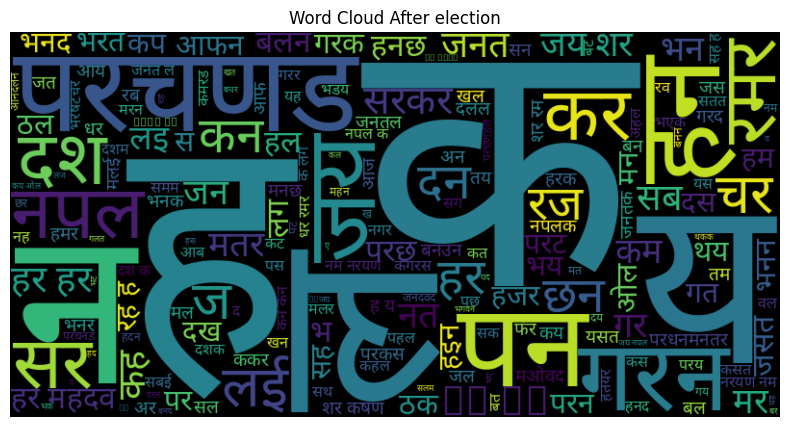

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem2

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After election')
plt.show()

**SENTIMENTAL ANALYSIS**

In [17]:
df = pd.read_csv(data_path)

In [18]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="dpkrm/NepaliSentimentAnalysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [19]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [20]:
df_filtered

,video_id,author,published_at,like_count,text,time_period,script
0,2-BSTr-gyic,@satyamevjayte2443,2021-12-06 18:40:20,1.0,राष्ट्र सर्वोपर.....,before_election,Devanagari
1,k0Aes-Knvts,@shresthark948,2022-01-07 05:34:01,0.0,यस्ता थुला ज का पएलत हु भन्ने यो २ डका ज्ञानमा...,before_election,Devanagari
2,14Nprv6u07w,@entertainment123gym,2022-02-21 09:25:08,0.0,नेपाल लाइ बिकास देश बनाउ न कुनै राजनितिक नेता ...,before_election,Devanagari
3,oF2qniNVJ50,@mansagurung8223,2022-10-17 11:53:17,0.0,गोरखा जिल्ला को माँक्से हारु ले बुझु पर्न कुरु,before_election,Devanagari
4,eNu2jzttZ8E,@rushgaming4077,2022-04-23 00:26:41,2.0,आहा कटि मिठो गीत... दया ह्याङ्ग सदा राम्रो,before_election,Devanagari
...,...,...,...,...,...,...,...
4304,ljtopKLhmoA,@khemrajsubedi9855,2024-11-13 12:52:11,0.0,केपिलाई दन्ड दिनैपदछ यो अधमिपापि ठगडाका ज्यानम...,after_election,Devanagari
4305,4JARsJnV7II,@emyhuntgaminghd3250,2024-07-14 16:08:53,0.0,खुद प्रर्या नेपाली काे खुनमा देशभक्ति छैन। यिन...,after_election,Devanagari
4306,dxBfJ6AYwkc,@RESHAMBhattarai-y8w,2024-10-23 02:22:57,0.0,सहिकुरा,after_election,Devanagari
4307,WCWmCtP9x44,@GangaRokaya-b1r,2024-03-18 15:47:56,0.0,हो जि,after_election,Devanagari


In [21]:
# Example prediction logic with truncation
df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None

for i, text in enumerate(df_filtered['text']):  # Assuming 'text' is the column with the content
    result = pipe(text, truncation=True, padding=True, max_length=512)[0]  # Truncate and pad to 512 tokens
    df_filtered.at[i, 'sentiment_label'] = result['label']
    df_filtered.at[i, 'confidence_score'] = result['score']

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


<ipython-input-21-a5bc6cfc2f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
<ipython-input-21-a5bc6cfc2f9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None


                                                text sentiment_label  \
0                               राष्ट्र सर्वोपर.....         LABEL_1   
1  यस्ता थुला ज का पएलत हु भन्ने यो २ डका ज्ञानमा...         LABEL_0   
2  नेपाल लाइ बिकास देश बनाउ न कुनै राजनितिक नेता ...         LABEL_0   
3     गोरखा जिल्ला को माँक्से हारु ले बुझु पर्न कुरु         LABEL_0   
4         आहा कटि मिठो गीत... दया ह्याङ्ग सदा राम्रो         LABEL_1   

  confidence_score  
0         0.998991  
1         0.999879  
2         0.999217  
3         0.999081  
4         0.999094  


In [22]:
# Map the sentiment labels to corresponding names
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'positive',
    'LABEL_2': 'neutral'
}

# Apply the mapping to the 'sentiment_label' column
df_filtered['sentiment_label'] = df_filtered['sentiment_label'].map(label_mapping)

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


                                                text sentiment_label  \
0                               राष्ट्र सर्वोपर.....        positive   
1  यस्ता थुला ज का पएलत हु भन्ने यो २ डका ज्ञानमा...        negative   
2  नेपाल लाइ बिकास देश बनाउ न कुनै राजनितिक नेता ...        negative   
3     गोरखा जिल्ला को माँक्से हारु ले बुझु पर्न कुरु        negative   
4         आहा कटि मिठो गीत... दया ह्याङ्ग सदा राम्रो        positive   

  confidence_score  
0         0.998991  
1         0.999879  
2         0.999217  
3         0.999081  
4         0.999094  


<ipython-input-22-a3863f4511b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_label'] = df_filtered['sentiment_label'].map(label_mapping)


In [23]:
df_filtered

,video_id,author,published_at,like_count,text,time_period,script,sentiment_label,confidence_score
0,2-BSTr-gyic,@satyamevjayte2443,2021-12-06 18:40:20,1.0,राष्ट्र सर्वोपर.....,before_election,Devanagari,positive,0.998991
1,k0Aes-Knvts,@shresthark948,2022-01-07 05:34:01,0.0,यस्ता थुला ज का पएलत हु भन्ने यो २ डका ज्ञानमा...,before_election,Devanagari,negative,0.999879
2,14Nprv6u07w,@entertainment123gym,2022-02-21 09:25:08,0.0,नेपाल लाइ बिकास देश बनाउ न कुनै राजनितिक नेता ...,before_election,Devanagari,negative,0.999217
3,oF2qniNVJ50,@mansagurung8223,2022-10-17 11:53:17,0.0,गोरखा जिल्ला को माँक्से हारु ले बुझु पर्न कुरु,before_election,Devanagari,negative,0.999081
4,eNu2jzttZ8E,@rushgaming4077,2022-04-23 00:26:41,2.0,आहा कटि मिठो गीत... दया ह्याङ्ग सदा राम्रो,before_election,Devanagari,positive,0.999094
...,...,...,...,...,...,...,...,...,...
4304,ljtopKLhmoA,@khemrajsubedi9855,2024-11-13 12:52:11,0.0,केपिलाई दन्ड दिनैपदछ यो अधमिपापि ठगडाका ज्यानम...,after_election,Devanagari,negative,0.998832
4305,4JARsJnV7II,@emyhuntgaminghd3250,2024-07-14 16:08:53,0.0,खुद प्रर्या नेपाली काे खुनमा देशभक्ति छैन। यिन...,after_election,Devanagari,positive,0.983117
4306,dxBfJ6AYwkc,@RESHAMBhattarai-y8w,2024-10-23 02:22:57,0.0,सहिकुरा,after_election,Devanagari,positive,0.876201
4307,WCWmCtP9x44,@GangaRokaya-b1r,2024-03-18 15:47:56,0.0,हो जि,after_election,Devanagari,neutral,0.999616


In [24]:
# Assuming 'time_period' is a column in your DataFrame and contains 'before_election' and 'after_election'
# and 'sentiment_label' contains the sentiment labels ('positive', 'negative', 'neutral')

# Filter for before_election and after_election
before_election_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_election_df = df_filtered[df_filtered['time_period'] == 'after_election']

# Count sentiment labels for before_election
before_election_counts = before_election_df['sentiment_label'].value_counts()

# Count sentiment labels for after_election
after_election_counts = after_election_df['sentiment_label'].value_counts()

# Display the counts
print("Sentiment counts before election:")
print(before_election_counts)

print("\nSentiment counts after election:")
print(after_election_counts)


Sentiment counts before election:
sentiment_label
negative    880
positive    666
neutral     525
Name: count, dtype: int64

Sentiment counts after election:
sentiment_label
negative    847
neutral     696
positive    695
Name: count, dtype: int64


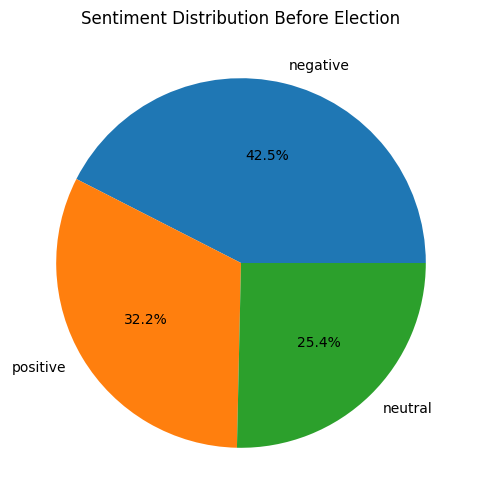

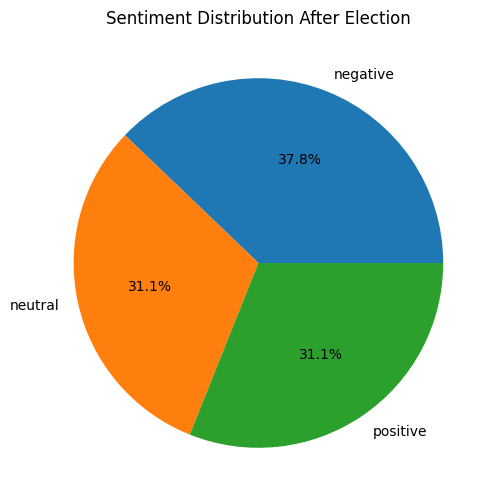

In [25]:
import matplotlib.pyplot as plt

# Plot the pie chart for before election
plt.figure(figsize=(6, 6))
before_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=before_election_counts.index)
plt.title('Sentiment Distribution Before Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()

# Plot the pie chart for after election
plt.figure(figsize=(6, 6))
after_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=after_election_counts.index)
plt.title('Sentiment Distribution After Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()


In [37]:
# Define a list of Nepali stopwords (you can add more words to this list if needed)
nepali_stopwords = [
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल','br' 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।'
    # Add any additional words you find unnecessary here
]

# Add English stopwords if you're also analyzing English texts
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

# Combine Nepali and English stopwords (optional)
stopwords_combined = set(nepali_stopwords + list(english_stopwords))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
import string  # Add this import at the top of your code

# Filter the words to exclude stopwords
def clean_text_without_stopwords(text, stopwords_combined):
    # Convert text to lowercase, remove punctuation, and split into words
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # This removes punctuation
    return [word for word in text.split() if word not in stopwords_combined]

# Apply the cleaning function to the text columns
before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


<ipython-input-41-10072db0a911>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
<ipython-input-41-10072db0a911>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


In [42]:
import string  # Add this import at the top of your code

# Filter the words to exclude stopwords
def clean_text_without_stopwords(text, stopwords_combined):
    # Convert text to lowercase, remove punctuation, and split into words
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # This removes punctuation
    return [word for word in text.split() if word not in stopwords_combined]

# Apply the cleaning function to the text columns
before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


<ipython-input-42-10072db0a911>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
<ipython-input-42-10072db0a911>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


Top 10 Words Before Election:
      Word  Count
0  प्रचण्ड    231
1       br    154
2   राम्रो    132
3       जय    120
4      छूर    110
5      चोर    106
6      लाइ     85
7      गीत     84
8     पानी     84
9     नेता     78

Top 10 Words After Election:
      Word  Count
0       जय    223
1       br    146
2  प्रचण्ड    141
3       हर    121
4   राम्रो    110
5       सर     99
6       है     94
7      चोर     81
8   महादेव     75
9     राजा     73


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 98 (b) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 114 (r) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


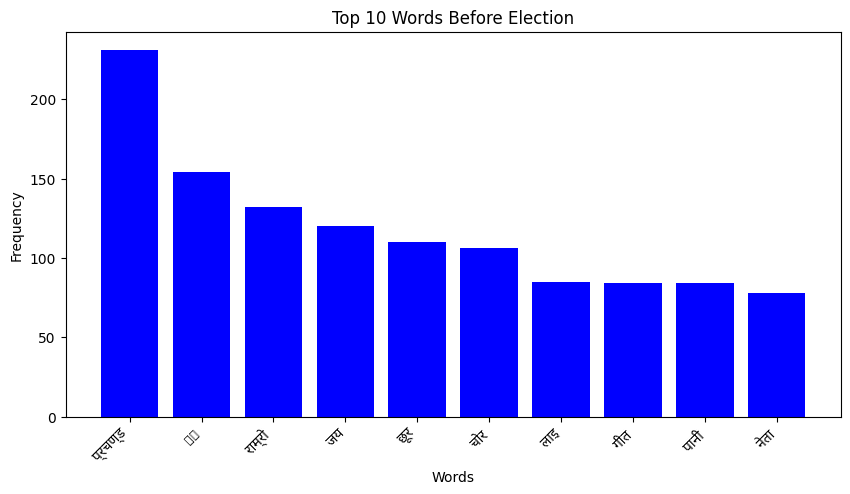

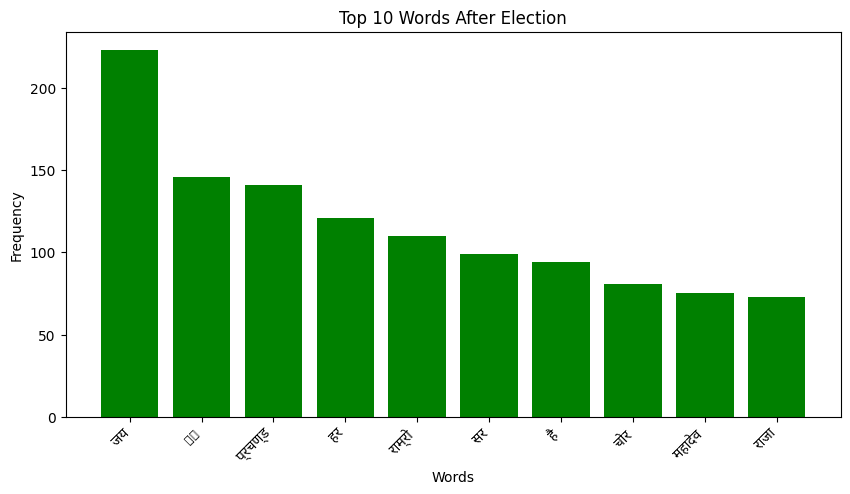

In [44]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import requests

# Load Devanagari-compatible font dynamically
font_url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf"
font_path = "NotoSansDevanagari-Regular.ttf"

# Download font if not already present
if not os.path.exists(font_path):
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)

# Load the font
deva_font = fm.FontProperties(fname=font_path)



# Recalculate word frequencies
before_election_words = [word for text in before_election_df['cleaned_text'] for word in text]
after_election_words = [word for text in after_election_df['cleaned_text'] for word in text]

before_election_word_counts = Counter(before_election_words)
after_election_word_counts = Counter(after_election_words)

# Get the top 10 most common words
top_before_words = before_election_word_counts.most_common(10)
top_after_words = after_election_word_counts.most_common(10)

# Convert to DataFrame for easy visualization
before_top_words_df = pd.DataFrame(top_before_words, columns=['Word', 'Count'])
after_top_words_df = pd.DataFrame(top_after_words, columns=['Word', 'Count'])

# Print the top words
print("Top 10 Words Before Election:")
print(before_top_words_df)

print("\nTop 10 Words After Election:")
print(after_top_words_df)

# Plot the top words before election
plt.figure(figsize=(10, 5))
plt.bar(before_top_words_df['Word'], before_top_words_df['Count'], color='blue')
plt.title('Top 10 Words Before Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()

# Plot the top words after election
plt.figure(figsize=(10, 5))
plt.bar(after_top_words_df['Word'], after_top_words_df['Count'], color='green')
plt.title('Top 10 Words After Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()


In [30]:
df_filtered.to_csv('/content/drive/My Drive/merged_data_sentiment_Prachanda.csv', index=False)